# Set up environment

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import GPy
%matplotlib inline
plt.style.use('seaborn')
def save_figure(fig, name):
    figure_dir = '../thesis/figures/'
    fig.savefig(figure_dir + name)

{'covariance': [[<matplotlib.lines.Line2D at 0x285fcd09390>]]}

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\figure.py:2362: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


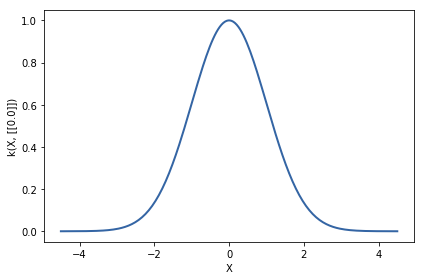

In [7]:

n = 5
X = np.random.uniform(-3.,3.,(n,1))
Y = np.sin(X) + np.random.randn(n,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance = 1., lengthscale= 1.)
m = GPy.models.GPRegression(X, Y, kernel)
kernel.plot()

# Sample prior for different kernels

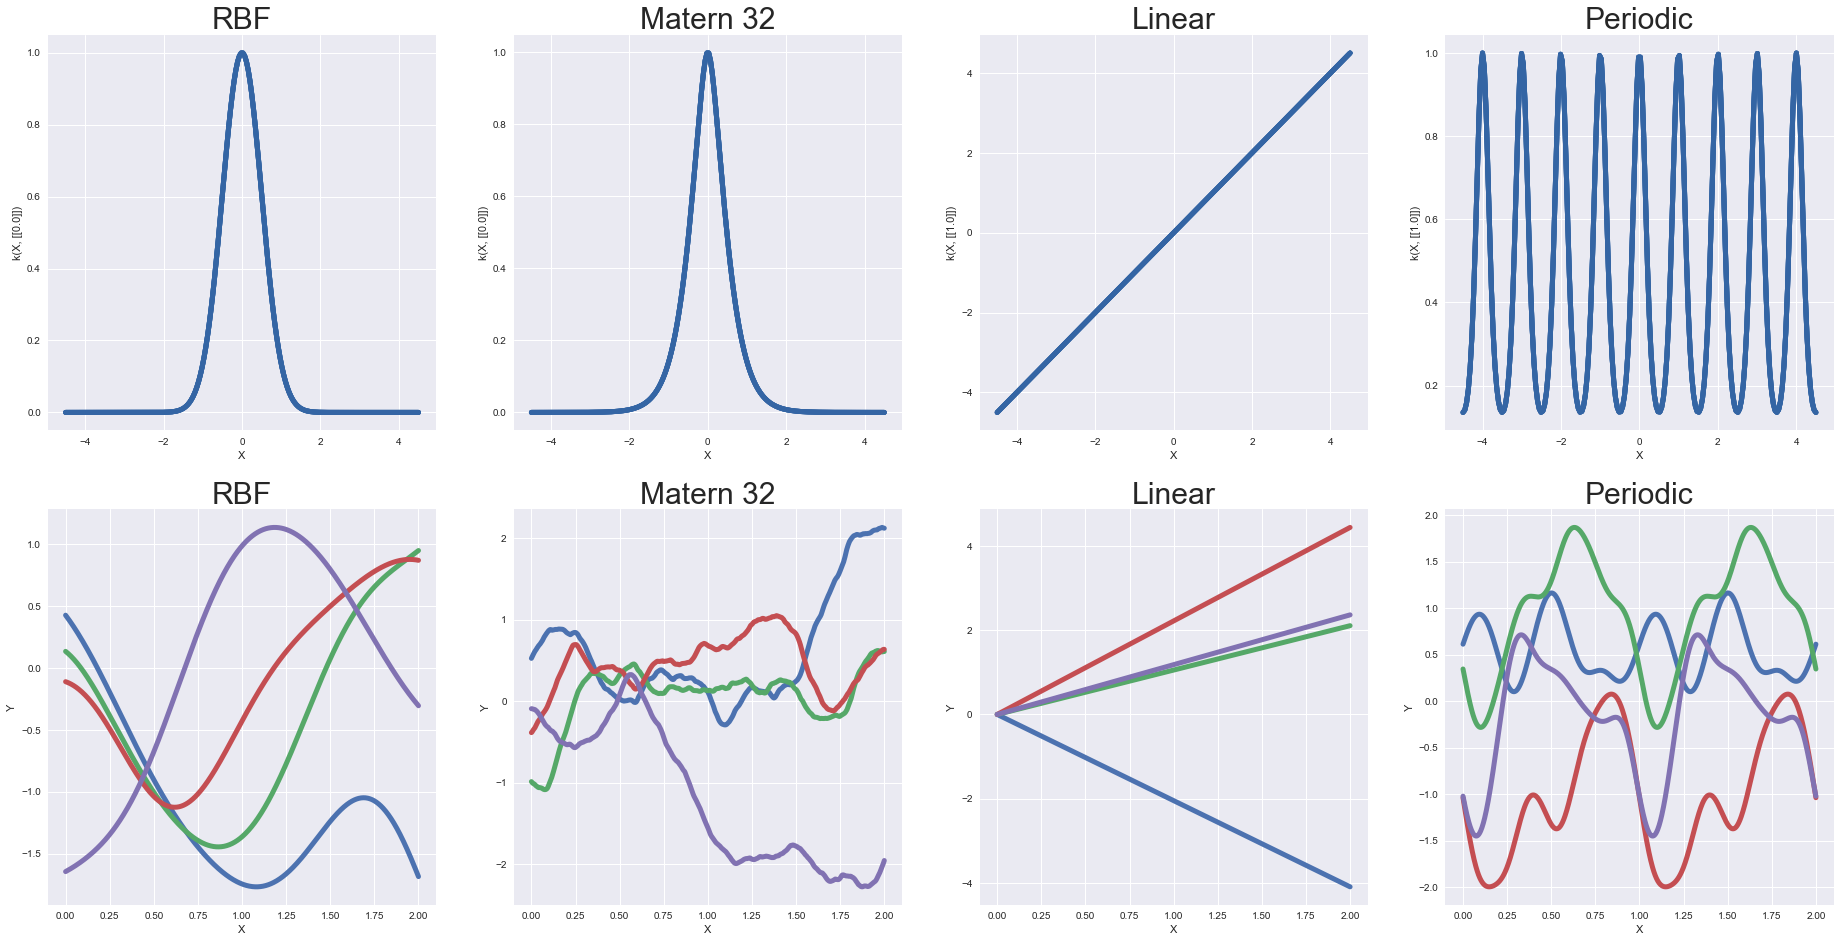

In [59]:


np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5), 'RBF'),
    (GPy.kern.Matern32(input_dim=1,lengthscale=0.5), 'Matern 32'),
    (GPy.kern.Linear(input_dim=1), 'Linear'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5), 'Periodic'),
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    2, len(kernels)
)

ix = lambda i, j: axs[j][i]

title_font_size = 30
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 4
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        k.plot(ax=ix(i, 0), linewidth=line_width)
        ix(i, 0).set_title(title, fontsize=title_font_size)

        ix(i, 1).plot(X[:],Z[n,:], linewidth=line_width)
        ix(i, 1).set_xlabel('X')
        ix(i, 1).set_ylabel('Y')
        ix(i, 1).set_title(title, fontsize=title_font_size)

save_figure(fig, 'kernel-priors-vert.pdf')


# Plot compound kernels 

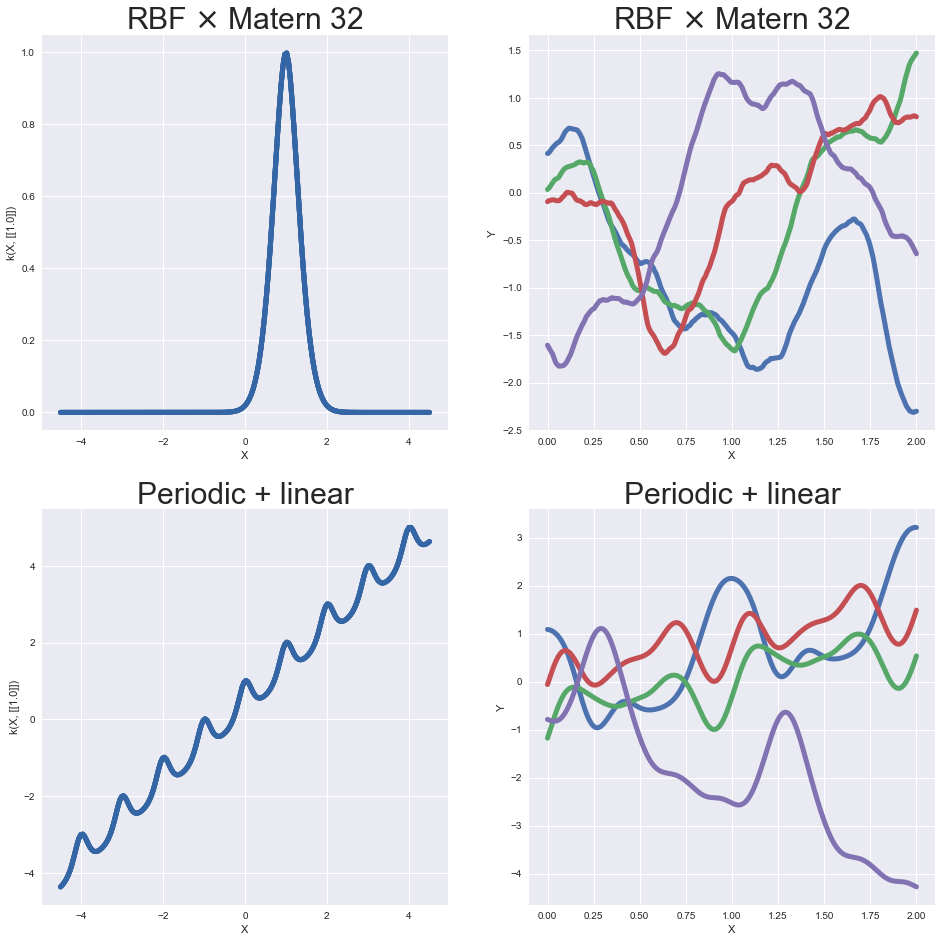

In [61]:
np.random.seed(1)
kernels = [
    (GPy.kern.RBF(input_dim=1,lengthscale=0.5)*GPy.kern.Matern32(input_dim=1,lengthscale=0.5), r'RBF $\times$ Matern 32'),
    (GPy.kern.StdPeriodic(input_dim=1, lengthscale=0.5) + GPy.kern.Linear(input_dim=1), 'Periodic + linear')
]

d = 800
X = np.linspace(0., 2., d)
X = X[:,None]

fig, axs = plot_grid(
    2, len(kernels)
)

ix = lambda i, j: axs[j][i]

title_font_size = 30
line_width = 5
for i, (k, title) in enumerate(kernels):
    mu = np.zeros((d))
    C = k.K(X,X)
    n_samples = 4
    Z = np.random.multivariate_normal(mu, C, n_samples)
    for n in range(n_samples):
        k.plot(ax=ix(0, i), linewidth=line_width)
        ix(0, i).set_title(title, fontsize=title_font_size)

        ix(1, i).plot(X[:],Z[n,:], linewidth=line_width)
        ix(1, i).set_xlabel('X')
        ix(1, i).set_ylabel('Y')
        ix(1, i).set_title(title, fontsize=title_font_size)

save_figure(fig, 'compound-kernels.pdf')


# Plot credible intervals

Text(0, 0.5, 'y')

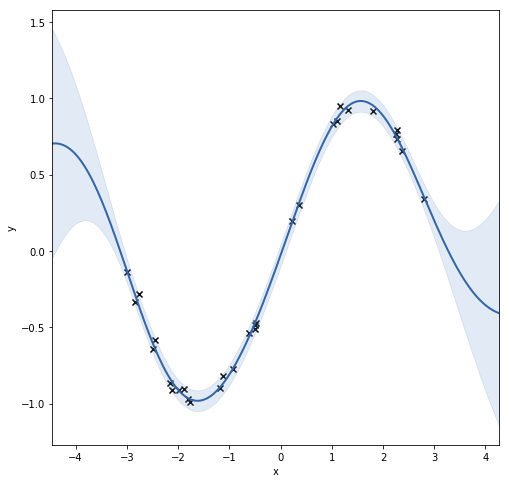

In [40]:
import GPy
import numpy as np
from IPython.display import display
from plotting import plot_grid
np.random.seed(1)

X = np.random.uniform(-3.,3.,(30,1))
Y = np.sin(X) + np.random.randn(30,1)*0.05
kernel = GPy.kern.RBF(input_dim=1, variance=2., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
fig, axs = plot_grid(
    1, 1
)

m.likelihood.variance = 0.001
m.likelihood.variance.fix()
m.optimize()
m.plot(ax=axs, legend=False)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

#x = mpatches.Patch(color='black', label='Data')
#x2 = mpatches.Patch(color='blue', label='Mean')
#plt.legend(handles=[x,x2])

axs.set_xlabel('x')
axs.set_ylabel('y')